In [1]:
import os
os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":4096:8"
import torch
import numpy as np
import random
import argparse
from Bernoulli_bandits_generator import StationaryBbs, Flip_flop, Smooth_change
from RNN_bandit_algorthims import RecurrentRNN, RecurrentGRU, RecurrentLSTM
from NeuAstro_algorithm import NeuroAstroRL
from Traditional_bandit_algorithms import TS, UCB, DUCB, SWUCB
from torch.utils.data import DataLoader, Subset
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
g= torch.Generator()
g.manual_seed(0)
random.seed(0)
torch.use_deterministic_algorithms(True)
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(0)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

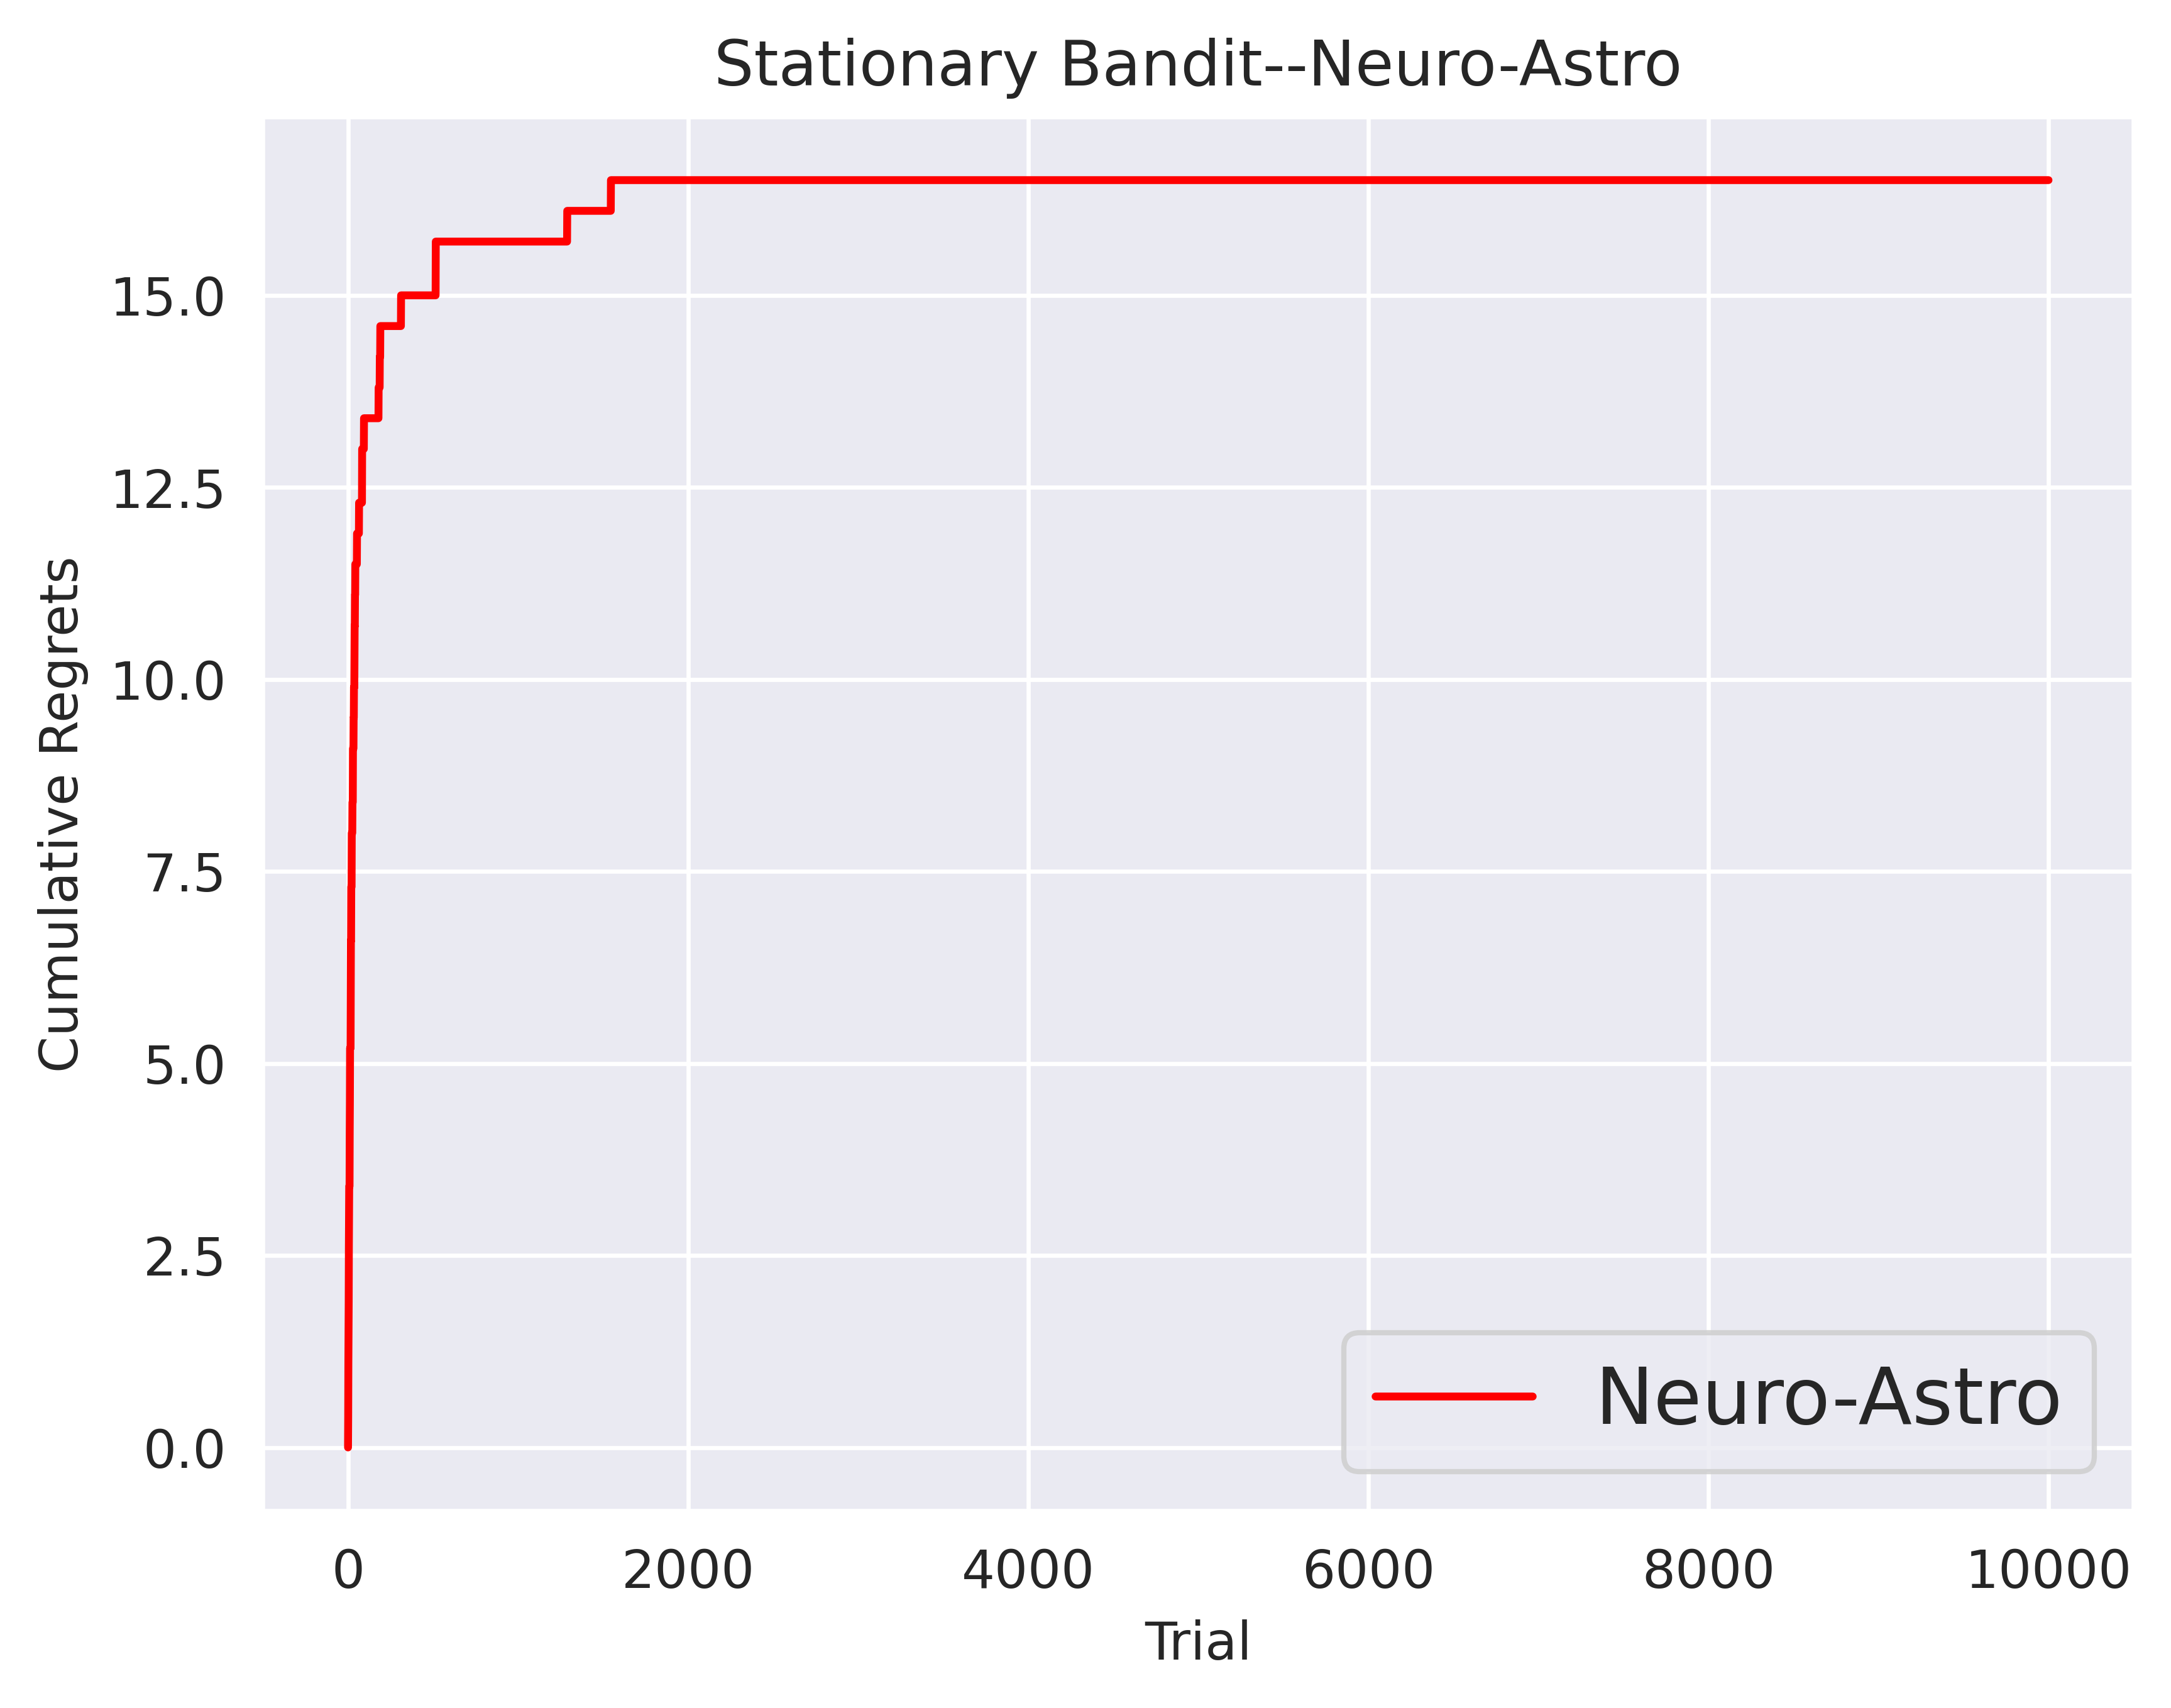

In [3]:
"""run simulation"""

dataset = StationaryBbs(n_samples=10000, n_actions=3, lamada=0.2)
dataload = DataLoader(dataset, batch_size=1, shuffle=False, generator=g)
model = NeuroAstroRL()
# model = RecurrentRNN()
rewards, regrets, cumulative_regrets = model.train(dataload)


#plot cumulative regrets
plt.figure(dpi=600)
plt.title("Stationary Bandit--Neuro-Astro")
plt.xlabel('Trial')
plt.ylabel('Cumulative Regrets')
plt.plot(np.arange(len(cumulative_regrets)), cumulative_regrets, label ="Neuro-Astro", linewidth=1.5, color ='red')
plt.legend(fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()
